Ignore the first 4 cells they are the functions and data from the previous section. (Ek sal dit later in n extension verander).

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
Vt =20 #m3
T = 25 +273.15 #C
R = 8.314 
ρ_h20 = 997000/18

H_N2 = 6.4*10**-6
H_O2 = 1.3*10**-5
H_CO2 = 3.3*10**-4
H_N2O = 2.4*10**-4
H_NO = 1.9*10**-5
H_NO2 = 1.2*10**-4

In [ ]:
def Conc(N):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    p_O2,p_CO2,p_N2 = Pressure(N)
    
    Vl = H2O/ρ_h20
    C_O2  = H_O2*p_O2
    C_CO2 = H_CO2*p_CO2
    C_N2  = H_N2*p_N2
    
    C_X1   = X1/Vl
    C_NH4 = NH4/Vl 
    C_G   = G/Vl
    C_NO2 = NO2/Vl
    C_NO3 = NO3/Vl
    
    C_X1 = X1/Vl
    C_X2 = X2/Vl
    C_X3 = X3/Vl
    C_X4 = X4/Vl
    C_X5 = X5/Vl
    C_H2O = 1
    return np.array([C_X1,C_X2,C_X3,C_X4,C_X5,C_N2,C_O2,C_CO2,C_H2O,C_G,C_NH4,C_NO2,C_NO3])

def Pressure(N):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    Vl = H2O/ρ_h20
    Vg = Vt - Vl
    n_gas = O2 + CO2 + N2 
    P = n_gas*R*T/Vg
    p_O2,p_CO2,p_N2 = O2/n_gas*P, CO2/n_gas*P, N2/n_gas*P
    return np.array([p_O2,p_CO2,p_N2])

In [42]:
def Illistrate(N,tspan,tmax,light,storm):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH3,NO2,NO3 = N
    Vl = H2O/ρ_h20
    #Gas phase
    N_gas = N2 + O2 + CO2
    plt.plot(tspan,N2*100/N_gas,label = '$N_2$')
    plt.plot(tspan,O2*100/N_gas,label = '$O_2$')
    plt.plot(tspan,CO2*100/N_gas,label = '$CO_2$')
    plt.ylim(0,100)
    plt.xlim(0,tmax)
    plt.ylabel('Gas percentage')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()
    

    
    #Concentrations
    C = Conc(N)/1000 #cmol/L
    
    #Biomass
    x1 = np.amax(C[0])
    x2 = np.amax(C[1])
    x3 = np.amax(C[2])
    x4 = np.amax(C[3])
    x5 = np.amax(C[4])
    xm = max([x1,x2,x3,x4,x5])
    plt.plot(tspan,C[0],label = '$X_1$')
    plt.plot(tspan,C[1],label = '$X_2$')
    plt.plot(tspan,C[2],label = '$X_3$')
    plt.plot(tspan,C[3],label = '$X_4$')
    plt.plot(tspan,C[4],label = '$X_5$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Biomass (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()  
    
    x1 = np.amax(C[10])
    x2 = np.amax(C[11])
    x3 = np.amax(C[12])
    xm = max([x1,x2,x3])
    plt.plot(tspan,C[10],label = '$NH_4$')
    plt.plot(tspan,C[11],label = '$NO_2$')
    plt.plot(tspan,C[12],label = '$NO_3$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Concentration (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()  
    
    xm = np.amax(C[9])
    plt.plot(tspan,C[9],label = '$Glucose$')
    if light != None:
        plt.plot(tspan,[light(i)*xm/50 for i in tspan],label = '$Light$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Concentration (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()

# Base organic model
5 main forms of biomass. Base model consitst of single reaction per organism. {Elaborate}

$$N_{total} = [X_1,X_2,X_3,X_4,X_5,N_2,O_2,CO_2,H_2O,G,NH_4,NO_2,NO_3]\space(mol\space or\space cmol)$$
$$C_{liquid} = [C_{X_1},C_{X_2},C_{X_3},C_{X_4},C_{X_5},C_{N_2},C_{O_2},C_{CO_2},C_{H_2O},C_{G},C_{NH_4},C_{NO_2},C_{NO_3}]   \space(\frac{mol}{m^3}\space or\space \frac{cmol}{m^3})$$

## Nitrogen and Carbon cycle
{Elaborate}
![title](CombinedCycle.png)

## Organisms
All plant models will return ($\frac{mol}{cmol_{biomass}}$) form.
### Plant
{Elaborate, skryf die reaksies uit in chemiese form, en die rate funkise}
2.78G + 0.19NO3 + 1.0125O2 -> X +1.78CO2 + 1.985H2O

X = C(1)H(1.59)O(0.4)N(0.19)

In [43]:
def Chloroplast(C,Φ):
    C_X1,C_X2,C_X3,C_X4,C_X5,C_N2,C_O2,C_CO2,C_H2O,C_G,C_NH4,C_NO2,C_NO3 = C
    δmax = 20
    δ = δmax*(Φ/(1+Φ))*(1-Φ/500)*(C_CO2/(1+C_CO2))*(1-C_CO2/500)
    return np.array([0,0,0,0,0,0,1,-1,-1,1,0,0,0])*δ

In [44]:
def Plant(C):
    C_X1,C_X2,C_X3,C_X4,C_X5,C_N2,C_O2,C_CO2,C_H2O,C_G,C_NH4,C_NO2,C_NO3 = C
    
    μmax = 2
    μ = μmax*(C_G/(1+C_G))*(1-C_G/500)*(C_O2/(1+C_O2))*(1-C_O2/500)*(C_NO3/(1+C_NO3))*(1-C_NO3/500)
    return np.array([1,0,0,0,0,0,-1.0125,1.78,1.985,-2.78,0,0,-0.18])*μ

#### Simulation
Now lets simulate a 72 hour period of time, where we experience a strong storm throughout the first day. 

In [45]:
def t40(t):
    if t <= 24:
        return 0.5
    else:
        return 0
def light(t):
    if t <=12:
        return 0
    elif t<= 24:
        return 50
    elif t<= 36:
        return 0
    elif t<= 48:
        return 50
    elif t<= 60:
        return 0
    elif t<= 72:
        return 50
    else:
        return 0

In [46]:
def Storm(ζ):
    return np.array([0,0,0,0,0,-ζ,-2*ζ,0,-1*ζ,0,0,ζ,ζ])

In [47]:
def S2(N,t):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    C = Conc(N)
    

    # Time triggered change in environment
    ζ = t40(t)
    Φ = light(t)
    
    #Processes/Organisms
    D1 = Storm(ζ)
    D2 = Chloroplast(C,Φ)*X1
    D3 = Plant(C)*X1
    Change = D1 + D2 + D3
    
    return Change

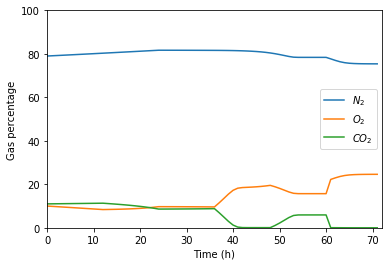

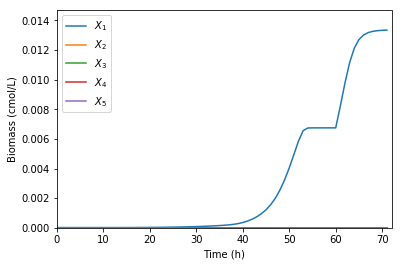

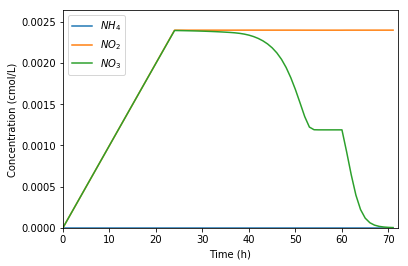

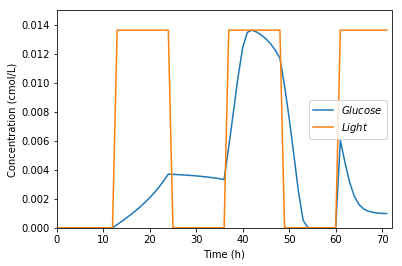

In [53]:
tmax = 72
tspan = np.arange(0,tmax,1)
Φ = 50
ζ = 0.5
n= 650
IN = [0.08,0,0,0,0,0.79*n,0.1*n,0.11*n,ρ_h20*5,0,0,0,0]
N = odeint(S2,IN,tspan).T
Illistrate(N,tspan,tmax,light,None)